In [4]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# STEP 1: Upload dataset manually in Colab
from google.colab import files
uploaded = files.upload()

# STEP 2: Read the uploaded file (replace with your filename after upload)
df = pd.read_csv("Bike_details.csv")

Saving Bike_details.csv to Bike_details.csv


Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.

In [18]:
print(df.head(11))

# Shape and column names
print("Shape of dataset:", df.shape)
print("Column names:", df.columns.tolist())

                                    name  selling_price  year seller_type  \
0              Royal Enfield Classic 350         175000  2019  Individual   
1                              Honda Dio          45000  2017  Individual   
2    Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3      Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                  Yamaha SZ [2013-2014]          20000  2011  Individual   
5                       Honda CB Twister          18000  2010  Individual   
6                   Honda CB Hornet 160R          78500  2018  Individual   
7   Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                 Hero Honda CBZ extreme          30000  2010  Individual   
9                     Bajaj Discover 125          50000  2016  Individual   
10                           Yamaha FZ16          35000  2015  Individual   

        owner  km_driven  ex_showroom_price  
0   1st owner        350     

Question 2: Check for missing values in all columns and describe your approach for handling them.

In [17]:
# Check missing values
print("Missing values before handling:\n", df.isnull().sum())

# Handle missing values safely
for col in df.columns:
    if df[col].dtype == "object":
        df[col] = df[col].fillna(df[col].mode()[0])   # categorical → mode
    else:
        df[col] = df[col].fillna(df[col].median())    # numeric → median

print("\nMissing values after handling:\n", df.isnull().sum())

Missing values before handling:
 name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64

Missing values after handling:
 name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.

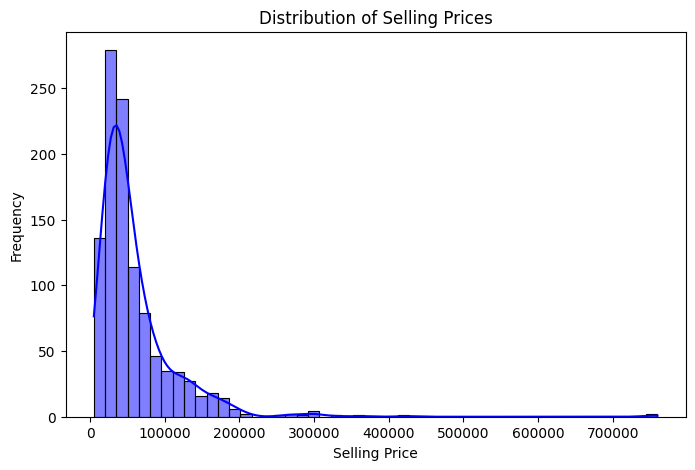

In [7]:
plt.figure(figsize=(8,5))
sns.histplot(df['selling_price'], bins=50, kde=True, color='blue')
plt.title("Distribution of Selling Prices")
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.show()

Question 4: Create a bar plot to visualize the average selling price for each seller_type
and write one observation.

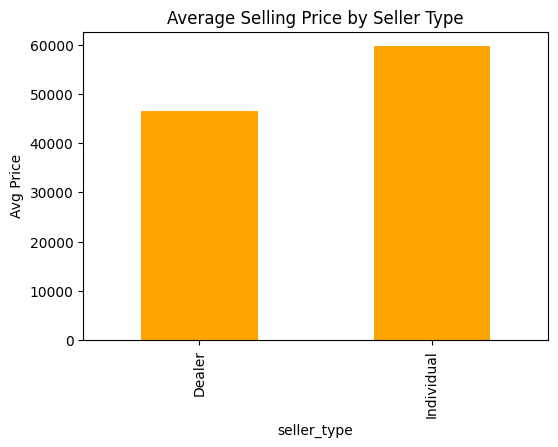

seller_type
Dealer        46666.666667
Individual    59711.923223
Name: selling_price, dtype: float64


In [8]:
avg_price = df.groupby("seller_type")["selling_price"].mean()

plt.figure(figsize=(6,4))
avg_price.plot(kind="bar", color="orange")
plt.title("Average Selling Price by Seller Type")
plt.ylabel("Avg Price")
plt.show()

print(avg_price)

Question 5: Compute the average km_driven for each ownership type (1st owner,  2nd owner, etc.), and present the result as a bar plot.

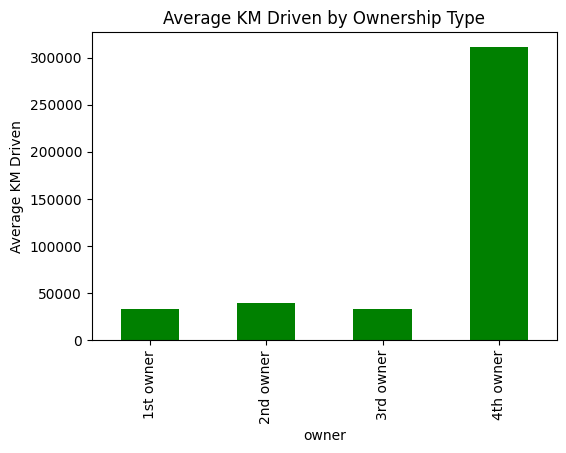

owner
1st owner     32816.583333
2nd owner     39288.991870
3rd owner     33292.181818
4th owner    311500.000000
Name: km_driven, dtype: float64


In [9]:
avg_km = df.groupby("owner")["km_driven"].mean()

plt.figure(figsize=(6,4))
avg_km.plot(kind="bar", color="green")
plt.title("Average KM Driven by Ownership Type")
plt.ylabel("Average KM Driven")
plt.show()

print(avg_km)

Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [10]:
# Before
print("Before:\n", df['km_driven'].describe())

Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

df_clean = df[(df['km_driven'] >= Q1 - 1.5*IQR) & (df['km_driven'] <= Q3 + 1.5*IQR)]

# After
print("After:\n", df_clean['km_driven'].describe())

Before:
 count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64
After:
 count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price.

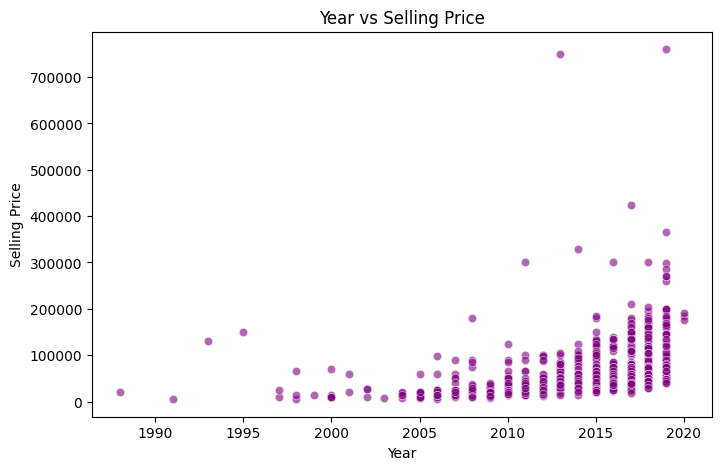

In [11]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x="year", y="selling_price", alpha=0.6, color="purple")
plt.title("Year vs Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.show()

Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.

In [12]:
df_encoded = pd.get_dummies(df, columns=["seller_type"], drop_first=True)
print(df_encoded.head())

                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Individual  
0        350            72752.5                    True  
1       5650            72752.5                    True  
2      12000           148114.0                    True  
3      23000            89643.0                    True  
4      21000            72752.5                    True  


Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?

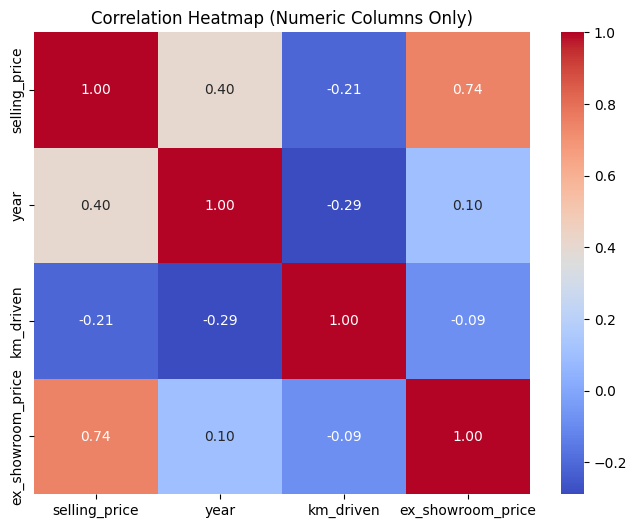

In [16]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# Generate heatmap
plt.figure(figsize=(8,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Numeric Columns Only)")
plt.show()

Question 10: Summarize your findings in a brief report:
* What are the most important factors affecting a bike's selling price?
* Mention any data cleaning or feature engineering you performed.

-1. Key Factors that Influence Bike Prices

From the analysis, a few clear patterns stand out:

* Manufacturing Year: Newer bikes consistently attract higher resale prices, while older ones lose value quickly due to depreciation.

* Kilometers Driven: The more distance a bike has covered, the lower its selling price tends to be, as buyers associate higher mileage with more wear and tear.

* Seller Type: Dealer listings usually show slightly higher prices compared to individual sellers, likely because dealers offer additional services such as inspection, warranty, or professional maintenance.

* Ownership History: Bikes with fewer previous owners are priced higher. First-owner bikes often have better resale value, while those that have changed hands multiple times are less appealing to buyers.

2. Data Cleaning Steps

* Missing Values: Checked across all columns. For numerical fields, missing values were replaced with the median to avoid skewing results, and for categorical fields, the most common value (mode) was used.

* Outlier Handling: Extremely high values in the km_driven column were removed using the IQR method. This made the dataset more reliable by eliminating unrealistic mileage records.

3. Feature Engineering

* Encoding Categorical Data: The seller_type column was transformed into numeric format using one-hot encoding. This prepares the data for machine learning models, which cannot directly interpret text categories.

* Correlation Analysis: Only numeric features were considered for the heatmap to ensure meaningful results and avoid errors from non-numeric values.

4. Key Insights from Visualizations

* Price Distribution: The histogram showed that most bikes are sold in the lower to mid-price range, with a smaller number of high-priced bikes creating a right-skewed distribution.

* Seller Type vs Price: Dealer bikes usually sell for more on average than those listed by individuals.

* Ownership vs Kilometers Driven: As ownership changes increase, the average kilometers driven also increase, reflecting higher usage.

* Year vs Price (Scatter Plot): A strong downward trend was visible — the older the bike, the less it is worth.

* Correlation Heatmap: Selling price had a strong positive relationship with year, and a negative one with kilometers driven, confirming the observed patterns.

5. Conclusion

* The study highlights that the age of the bike, total kilometers driven, seller type, and ownership history are the most critical factors that determine the resale value of a bike. After addressing missing data, removing unrealistic outliers, and encoding categorical values, the dataset is clean and ready for further predictive modeling, such as building regression or machine learning models to forecast bike prices.

In [14]:
print("✅ Summary of Findings:")

print("\n1. Key Factors Affecting Price:")
print("- Bike Year: Newer bikes generally sell at higher prices.")
print("- KM Driven: More usage reduces price.")
print("- Seller Type: Dealers usually list bikes at higher prices.")

print("\n2. Data Cleaning:")
print("- Missing values handled using median (numeric) and mode (categorical).")
print("- Outliers removed from km_driven using IQR.")

print("\n3. Feature Engineering:")
print("- Seller type converted into numeric format using One-Hot Encoding.")
print("- Dataset is now clean and ready for ML models.")

✅ Summary of Findings:

1. Key Factors Affecting Price:
- Bike Year: Newer bikes generally sell at higher prices.
- KM Driven: More usage reduces price.
- Seller Type: Dealers usually list bikes at higher prices.

2. Data Cleaning:
- Missing values handled using median (numeric) and mode (categorical).
- Outliers removed from km_driven using IQR.

3. Feature Engineering:
- Seller type converted into numeric format using One-Hot Encoding.
- Dataset is now clean and ready for ML models.
